## Problem 2: Logistic Regression 2
Bryan Zhao, 24-787:B

In [1]:
# Import all the package you need to use like before:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import scipy.optimize as optimize
import scipy

In [3]:
# Load the data like before:

In [4]:
data = np.genfromtxt('P2data2.txt', delimiter = ',') # imports as a numpy nd-array
X = data[:, [0, 1]] # extract first two columns
X = np.c_[np.ones((data.shape[0], 1)), X] # append a column of 1's for theta_0
y = data[:, 2] # binary class
print('Data\'s dimensions:', data.shape)
print(data[0:10, :], '...')

Data's dimensions: (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]
 [-0.39804   0.034357  1.      ]
 [-0.30588  -0.19225   1.      ]
 [ 0.016705 -0.40424   1.      ]
 [ 0.13191  -0.51389   1.      ]] ...


In [5]:
# Plot the data like before:

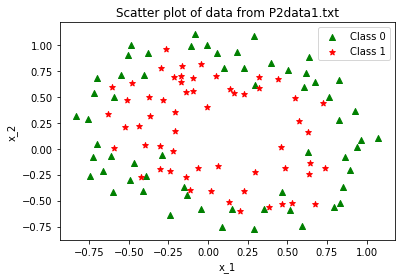

In [6]:
plt.scatter(X[:, 1][y==0], X[:,2][y==0], c='g', marker='^', label = 'Class 0');
plt.scatter(X[:, 1][y==1], X[:,2][y==1], c='r', marker='*', label = 'Class 1');
plt.title("Scatter plot of data from P2data1.txt")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend() # automatic placement of legend
plt.show() # show the plot

In [7]:
# Define the sigmoid function like before:

In [8]:
def sigmoid(x):
    # numpy can handle scalar, vector or matrices the same with .array() and .exp()
    return 1 / (1 + np.exp(-x)) 

In [9]:
# Define the regulated compute cost function:

In [10]:
def costReg(theta, X, y, learningRate):
    # try to vectorize, rather than loop as before
    m = X.shape[0] # number of training samples
    sum = 0 # initialize
    for i in range(m):
        sum += (-y[i]*log(sigmoid(theta[:].T.dot(X[i, :]))) - (1-y[i])*log(1 - sigmoid(theta[:].T.dot(X[i, :]))))
    cost = sum / m # without regularization
    
    # recall, don't regularize theta_0 term, so start from theta index 1
    reg_term = (learningRate * np.sum(np.power(theta[1:],2)))/(2*m) # np.power gives element-wise power
    regulated_cost = cost + reg_term # with regularization
    return regulated_cost

In [11]:
# Define the regulated compute gradient function:

In [12]:
def gradientReg(theta, X, y, learningRate):
    m = X.shape[0] # number of training samples
    dim = X.shape[1]
    grad = np.zeros(dim)
    for i in range(m):
        for j in range(dim):
            grad[j] += (sigmoid(theta[:].T.dot(X[i, :])) - y[i])*X[i, j]
    # bias theta_0 should not be regularized, so add a 0
    regularized_grad = grad/m + np.concatenate(([0], (learningRate*theta[1:])/m), axis=0)
    return regularized_grad

In [13]:
# Map the 2D features into 28D features (6 degree)

In [14]:
from sklearn.preprocessing import PolynomialFeatures 
poly_sixth = PolynomialFeatures(6) # transforms into 6th deg poly
X_28D = poly_sixth.fit_transform(X[:,1:]) # pull 2D features
print('New feature vector has shape:', X_28D.shape)

New feature vector has shape: (118, 28)


In [15]:
# Compute cost and gradient:

In [16]:
num_dims = X_28D.shape[1]
thetas_init = np.zeros(num_dims)
regularized_cost = costReg(thetas_init, X_28D, y, 1)
regularized_grad = gradientReg(thetas_init, X_28D, y, 1)
print('Regularized cost:', regularized_cost)
print('Regularized gradient:', regularized_grad)

Regularized cost: 0.6931471805599461
Regularized gradient: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [17]:
# Optimize the cost to find the minimum cost (fmin_tnc):

In [38]:
lambda_reg_overfit = 0.0001 # regularization parameter
result = optimize.fmin_tnc(costReg, thetas_init, approx_grad=1, args = (X_28D, y, lambda_reg_overfit), epsilon=1.0E-4)
print('Optimization result:', result) # returns ndarray (solution), nfeval, return code
learned_thetas_overfit = result[0]
print('\nOptimized cost with overfitted lambda:', costReg(learned_thetas_overfit, X_28D, y, lambda_reg_overfit))

lambda_reg = 100
result_reg = optimize.fmin_tnc(costReg, thetas_init, approx_grad=1, args = (X_28D, y, lambda_reg), epsilon=1.0E-4)
learned_thetas_reg = result_reg[0]
print('Optimized cost underfitted lambda (regularized):', costReg(learned_thetas_reg, X_28D, y, lambda_reg))

# Using initial guess of w = 0 and lambda = 1
lambda_to_print = 1
result_to_print = optimize.fmin_tnc(costReg, thetas_init, approx_grad=1, args = (X_28D, y, lambda_to_print), epsilon=1.0E-4)
learned_thetas_print = result_to_print[0]
print('Optimized cost with w=0, thetas=0, lambda=1:', costReg(learned_thetas_print, X_28D, y, lambda_to_print))

Optimization result: (array([  3.152691  ,  -0.76881437,   3.14786408, -13.43268865,
        -9.1694346 ,   4.70273666,   2.74587225,  15.85573796,
        26.8913565 ,   0.15615128,  45.28660615,  11.67876602,
        -3.7322062 ,  -4.778029  , -31.24805281,   9.8058809 ,
        -8.49134824,  -5.89986406, -14.92910796, -16.16690663,
        17.90716807, -72.90082144, -36.09975562, -13.1147814 ,
        30.18632491, -53.76153998, -37.69370346,  -3.17024096]), 280, 3)

Optimized cost with overfitted lambda: 0.2860170524415062
Optimized cost underfitted lambda (regularized): 0.6864838616747759
Optimized cost with w=0, thetas=0, lambda=1: 0.5290028608801828


In [31]:
# Define a predict function to calculate the result like before:

In [32]:
def predict(theta, X_28D):
    prediction = sigmoid(X_28D.dot(theta.T)) > 0.5 # find P(y=1) > 0.5
    return prediction.astype(int)

In [33]:
# Find the accuracy of the regulated logistic regression like before:

In [34]:
prediction = predict(learned_thetas_print, X_28D)
comparison = (prediction == y) # element-wise comparison
num_correct = np.count_nonzero(comparison) # count number of matches
print('Accuracy of logistic regression (regularized): {}%'.format(num_correct/y.size))

Accuracy of logistic regression (regularized): 0.8305084745762712%


In [23]:
# Plot the data and boundary (Need to map the features here):

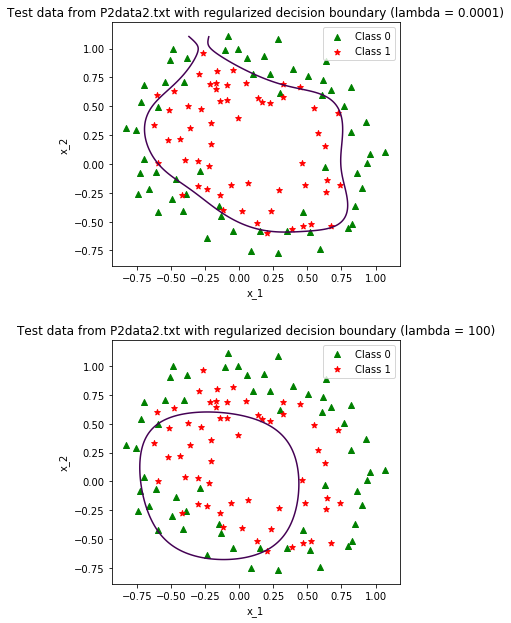

In [27]:
min_feature1 = X[:, 1].min() # find mins and maxes for meshgrid
max_feature1 = X[:, 1].max()
min_feature2 = X[:, 2].min()
max_feature2 = X[:, 2].max()
x_span = np.linspace(min_feature1, max_feature1, 1000)
y_span = np.linspace(min_feature2, max_feature2, 1000)
x_mesh, y_mesh = np.meshgrid(x_span, y_span) # generate 2d mesh
mesh_to_28D = poly_sixth.fit_transform(np.vstack((x_mesh.ravel(), y_mesh.ravel())).T) # map features to 28D
z_1 = sigmoid(mesh_to_28D.dot(learned_thetas_overfit)).reshape(x_mesh.shape) # reshape output to match grid

# generate plots
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.contour(x_mesh, y_mesh, z_1, 0.5); # generate contour at level 0.5
plt.scatter(X[:, 1][y==0], X[:,2][y==0], c='g', marker='^', label = 'Class 0');
plt.scatter(X[:, 1][y==1], X[:,2][y==1], c='r', marker='*', label = 'Class 1');
plt.title('Test data from P2data2.txt with regularized decision boundary (lambda = {})'.format(lambda_reg_overfit))
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend() # automatic placement of legend

z_2 = sigmoid(mesh_to_28D.dot(learned_thetas_reg)).reshape(x_mesh.shape) # reshape output to match grid
plt.subplot(2, 1, 2)
plt.contour(x_mesh, y_mesh, z_2, 0.5); # generate contour at level 0.5
plt.scatter(X[:, 1][y==0], X[:,2][y==0], c='g', marker='^', label = 'Class 0');
plt.scatter(X[:, 1][y==1], X[:,2][y==1], c='r', marker='*', label = 'Class 1');
plt.title('Test data from P2data2.txt with regularized decision boundary (lambda = {})'.format(lambda_reg))
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend() # automatic placement of legend
plt.subplots_adjust(left=0.5, bottom=0.1, hspace = 0.3)

In [25]:
## End of HW-2-2